In [169]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.stats as stats

In [3]:
df= pd.read_csv('data.csv') #原始数据

In [4]:
data=df.dropna(axis = 0) #把数据不全的删掉，41757 rows x 13 columns
data.to_csv('data.csv')
print(data)

       Unnamed: 0     No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES  \
0              24     25  2010      1    2     0  129.0   -16  -4.0  1020.0   
1              25     26  2010      1    2     1  148.0   -15  -4.0  1020.0   
2              26     27  2010      1    2     2  159.0   -11  -5.0  1021.0   
3              27     28  2010      1    2     3  181.0    -7  -5.0  1022.0   
4              28     29  2010      1    2     4  138.0    -7  -5.0  1022.0   
...           ...    ...   ...    ...  ...   ...    ...   ...   ...     ...   
41752       43819  43820  2014     12   31    19    8.0   -23  -2.0  1034.0   
41753       43820  43821  2014     12   31    20   10.0   -22  -3.0  1034.0   
41754       43821  43822  2014     12   31    21   10.0   -22  -3.0  1034.0   
41755       43822  43823  2014     12   31    22    8.0   -22  -4.0  1034.0   
41756       43823  43824  2014     12   31    23   12.0   -21  -3.0  1034.0   

      cbwd     Iws  Is  Ir  
0       SE    1.79   0

In [163]:
data2=data.drop(["cbwd",'No',],axis=1)
data2.to_csv('data02.csv',index=None)
#print(data2)
data3= data[(data.year==2011)]    #选了2011年的数据
data3= data3.drop(['No','year','DEWP'],axis=1)
#data3.to_csv('data03.csv')
print(data3)

       Unnamed: 0  month  day  hour  pm2.5  TEMP    PRES cbwd    Iws  Is  Ir
8091         8784      1    2     0   36.0  -7.0  1037.0   NW  75.10   0   0
8092         8785      1    2     1   31.0  -7.0  1037.0   NE   4.02   0   0
8093         8786      1    2     2   20.0  -7.0  1037.0   NE   8.94   0   0
8094         8787      1    2     3   19.0  -8.0  1037.0   NW   4.02   0   0
8095         8788      1    2     4   18.0  -8.0  1037.0   NE   4.02   0   0
...           ...    ...  ...   ...    ...   ...     ...  ...    ...  ..  ..
16118       17515     12   31    19  209.0  -3.0  1029.0   cv   2.68   0   0
16119       17516     12   31    20  217.0  -6.0  1029.0   NE   0.89   0   0
16120       17517     12   31    21  223.0  -6.0  1030.0   cv   0.89   0   0
16121       17518     12   31    22  251.0  -6.0  1030.0   NE   1.79   0   0
16122       17519     12   31    23  283.0  -6.0  1030.0   cv   0.89   0   0

[8032 rows x 11 columns]


In [198]:
datase= data3[(data3.cbwd=='SE')&(data3.hour==21)]
datacv= data3[(data3.cbwd=='cv')&(data3.hour==21)]
datasw= data3[(data3.cbwd=='SW')&(data3.hour==21)]
datane= data3[(data3.cbwd=='NE')&(data3.hour==21)]
datanw= data3[(data3.cbwd=='NW')&(data3.hour==21)]
#print(len(datase),(len(datacv)),(len(datane)),len(datanw))
datase.to_csv('data11.csv')
datacv.to_csv('data12.csv')
datasw.to_csv('data13.csv')
datane.to_csv('data14.csv')
datanw.to_csv('data15.csv')

148 72 30 84


In [188]:
mse= np.mean(datase['pm2.5'])
mcv= np.mean(datacv['pm2.5'])
msw= np.mean(datasw['pm2.5'])
mne= np.mean(datane['pm2.5'])
mnw= np.mean(datanw['pm2.5'])
print(mse,mcv,msw,mne,mnw)

112.29054054054055 164.65277777777777 nan 113.63333333333334 59.642857142857146


In [197]:
x= datase['pm2.5']
y= datanw['pm2.5']
nx=len(x)
ny=len(y)
mx= mse
my= mnw
Sx = np.sum(x**2) - np.sum(x)**2/nx
Sy = np.sum(y**2) - np.sum(y)**2/ny
shat = (Sx + Sy)/(nx+ny-2)
t = (mx-my)/np.sqrt(shat*(1/nx+1/ny))
pval =2*(1 - stats.t.cdf(np.abs(t),nx+ny-2))
print(pval,t)

1.1514261537115544e-05 4.484998048658145


In [179]:
O = np.array([135, 118,95,60])
p = np.array([.333, .2, .1, .36])
T = p * np.sum(O)
           
T = np.outer(n, m) / np.sum(n)
T

In [177]:
D = np.sum((O-T)**2/T)
ddl = 4-1
pval = 1 - stats.chi2.cdf(D,ddl)
pval

0.0

In [159]:
data4= data3[(data3.Is!=0)&(data['pm2.5']<150)]  #ls 不等于零
#data4.to_csv('data04.csv')

/Users/mac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [10]:
data5= data3[data3.Ir!=0]  #lr 不等于零
data5.to_csv('data04.csv')

In [199]:
data6=data3[data.hour==14]  # 9.21 温度3.11 压强
#data7=data3[((data.day==21)&(data.month==10))|((data.day==29)&(data.month==9))]
data9=data3[((data.month==9)&(data.day==21))]
print(data9)

       Unnamed: 0  month  day  hour  pm2.5  TEMP    PRES cbwd    Iws  Is  Ir
13810       15072      9   21     0   57.0  12.0  1017.0   cv   2.23   0   0
13811       15073      9   21     1   47.0  10.0  1016.0   cv   3.12   0   0
13812       15074      9   21     2   60.0  10.0  1016.0   NW   1.79   0   0
13813       15075      9   21     3   66.0  11.0  1016.0   NW   3.58   0   0
13814       15076      9   21     4   37.0  10.0  1016.0   NW   6.71   0   0
13815       15077      9   21     5   45.0   9.0  1016.0   NW   9.84   0   0
13816       15078      9   21     6   57.0  10.0  1016.0   NW  11.63   0   0
13817       15079      9   21     7   58.0  12.0  1017.0   NW  14.76   0   0
13818       15080      9   21     8   45.0  15.0  1017.0   NW  18.78   0   0
13819       15081      9   21     9   30.0  19.0  1017.0   NE   4.02   0   0
13820       15082      9   21    10   38.0  21.0  1017.0   NW   3.13   0   0
13821       15083      9   21    11   31.0  23.0  1016.0   NW   6.26   0   0

/Users/mac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/Users/mac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [209]:
y= data9['pm2.5'] #所有pm2.5数值 （根据用的data不一样要换不同data，现在是data5

def regression (variable):
    x= data9[variable]   #换的时候这里也要改一下 data
    sx2 = np.sum((x-np.mean(x))**2)
    sy2 = np.sum((y-np.mean(y))**2)
    sxy=((x-np.mean(x)).T @ (y-np.mean(y)))
    a = sxy/sx2
    b = np.mean(y) - a*np.mean(x)
    n = len(x)
   # a1 = (n*x.T@y - np.sum(x)*np.sum(y)) / (n*x.T@x - np.sum(x)*np.sum(x))
  #  a2 = ((x-np.mean(x)).T @ y ) / ((x-np.mean(x)).T @ (x-np.mean(x)))
    print('a=',a,'b=',b)
    xm = np.min(x);
    xM = np.max(x);
    ym = a*xm+b;
    yM = a*xM+b;
    plt.plot([xm,xM],[ym,yM],'gv-', linewidth=2)
    plt.plot(x,y,'b+')
    plt.show()
    yp = a*x+b
    e = y - yp
    SCT = np.sum((y-np.mean(y))**2)  # Somme des carrés totaux
    SCR = np.sum(e**2)  # Somme des carrés des résidus
    SCM = np.sum(((y-e)-np.mean(y))**2)    # Somme des carrés de la partie expliquée
    SCT, SCM, SCR
    R2 = 1- SCR/SCT
    print('R2=',R2)
    

a= -2.2233969986357436 b= 78.7800136425648


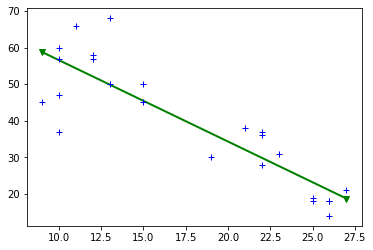

R2= 0.7610966726583916


In [210]:
regression ('TEMP')

In [208]:
x= data9['TEMP']
a= -2.223
b= 78.78
var= (1/(len(x)-2))*np.sum(y-a*x-b)**2
sx2 = np.sum((x-np.mean(x))**2)
t= a/(np.sqrt(var/sx2))
pval =2*(1 - stats.t.cdf(np.abs(t),nx+ny-2))
t,pval

(-1940.27316415159, 0.0)

a= 2.48323793949305 b= -2229.941946034342


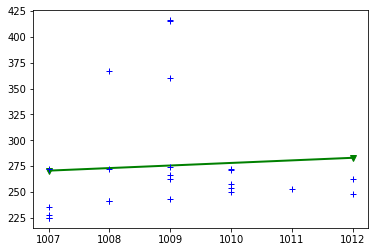

R2= 0.004475619627935745


In [158]:
regression ('PRES')

a= 2.200563450304512 b= 40.07275137755313


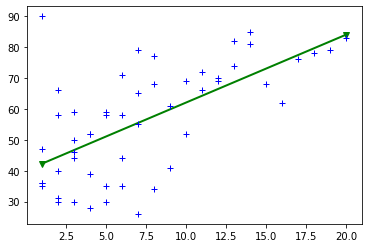

R2= 0.4045124468776612


In [161]:
regression ('Is')

a= -4.890129719544894 b= 98.5435683745199


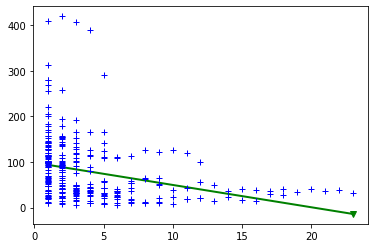

R2= 0.08778586265421162


In [227]:
regression('Ir')

In [172]:
yp = a*x+b
e = y - yp
e

8784     -60.316745
8785     -65.316745
8786     -76.316745
8787     -77.174814
8788     -78.174814
            ...    
17515    112.115527
17516    120.541323
17517    126.541323
17518    154.541323
17519    186.541323
Length: 8032, dtype: float64

In [173]:
n = len(e)
sigma2_hat = 1/(n-2)* e.T@e
sigma2_hat

8641.047069520628

In [82]:
def extractlow(year):
    global timelow
    time = data[(data.year==year)]
    timelow = time[(time['pm2.5'])<35]
    return timelow
time2010low= abstractlow(2010)
time2011low= abstractlow(2011)
time2012low= abstractlow(2012)
time2013low= abstractlow(2013)
time2014low= abstractlow(2014) 
timealllow= data[(data['pm2.5'])<35]

In [83]:
#重复做 polluting episode 和 strongly high pm2.5
def extractmid(year):
    global timemid
    time= data[(data.year==year)]
    timemid=time[(time['pm2.5'])<=150]
    return timemid
time2010mid= abstractmid(2010)
time2011mid= abstractmid(2011)
time2012mid= abstractmid(2012)
time2013mid= abstractmid(2013)
time2014mid= abstractmid(2014) 
timeallmid= data[(data['pm2.5'])<=150]

In [84]:
def extracthigh(year):
    global timehigh
    time= data[(data.year==year)]
    timehigh=time[(time['pm2.5'])>150]
    return timehigh
time2010high= abstracthigh(2010)
time2011high= abstracthigh(2011)
time2012high= abstracthigh(2012)
time2013high= abstracthigh(2013)
time2014high= abstracthigh(2014) 
timeallhigh= data[(data['pm2.5'])>150]

In [85]:
pmlow=time2010low+time2011low+time2012low+time2013low+time2014low+timealllow #所有小于35的pm2.5数据
pmmid=time2010mid+time2011mid+time2012mid+time2013mid+time2014mid+timeallmid-pmlow #所有大于35小于150的pm2.5数据
pmhigh=data-pmmid #所有大于150 的pm2.5数据

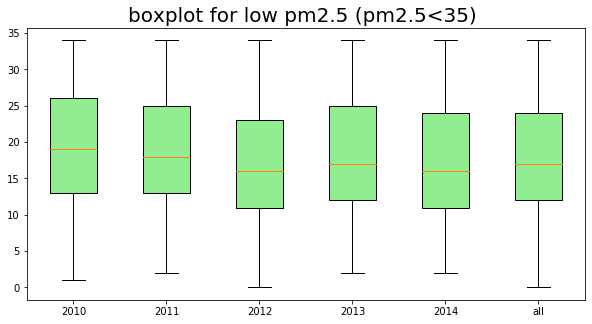

In [86]:
plt.figure(figsize=(10,5))
plt.title('boxplot for low pm2.5 (pm2.5<35) ',fontsize=20)
labels = '2010','2011','2012','2013','2014','all'
plt.boxplot([time2010low['pm2.5'], time2011low['pm2.5'], time2012low['pm2.5'], time2013low['pm2.5'],time2014low['pm2.5'],timealllow['pm2.5']], labels = labels,patch_artist = True,boxprops = {'color':'black','facecolor':'lightgreen'})
plt.show()

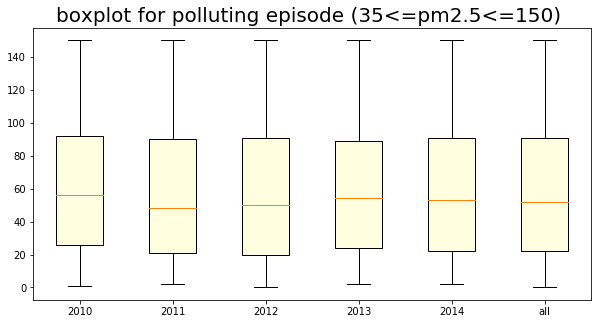

In [87]:
plt.figure(figsize=(10,5))
plt.title('boxplot for polluting episode (35<=pm2.5<=150) ',fontsize=20)
labels = '2010','2011','2012','2013','2014','all'
plt.boxplot([time2010mid['pm2.5'], time2011mid['pm2.5'], time2012mid['pm2.5'], time2013mid['pm2.5'],time2014mid['pm2.5'],timeallmid['pm2.5']], labels = labels,patch_artist = True,boxprops = {'color':'black','facecolor':'lightyellow'})
plt.show()

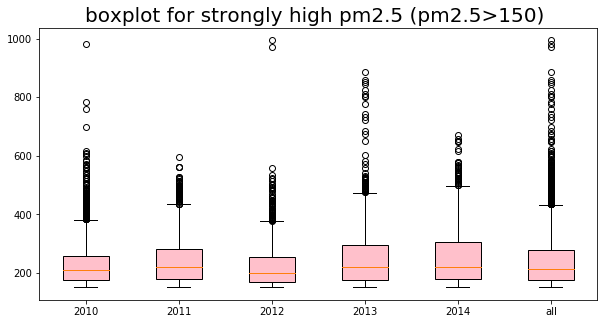

In [88]:
plt.figure(figsize=(10,5))
plt.title('boxplot for strongly high pm2.5 (pm2.5>150) ',fontsize=20)
labels = '2010','2011','2012','2013','2014','all'
plt.boxplot([time2010high['pm2.5'], time2011high['pm2.5'], time2012high['pm2.5'], time2013high['pm2.5'],time2014high['pm2.5'],timeallhigh['pm2.5']], labels = labels,patch_artist = True,boxprops = {'color':'black','facecolor':'pink'})
plt.show()

make the PCA(Principal Component Analysis) 　 

In [115]:
#X=data.drop(["cbwd",'No',],axis=1) #命x为去掉pm2.5和 风向的表格
#print(X)
X = np.loadtxt("data02.csv", delimiter=",",skiprows=1)
print(X)

[[2.0100e+03 1.0000e+00 2.0000e+00 ... 1.7900e+00 0.0000e+00 0.0000e+00]
 [2.0100e+03 1.0000e+00 2.0000e+00 ... 2.6800e+00 0.0000e+00 0.0000e+00]
 [2.0100e+03 1.0000e+00 2.0000e+00 ... 3.5700e+00 0.0000e+00 0.0000e+00]
 ...
 [2.0140e+03 1.2000e+01 3.1000e+01 ... 2.4270e+02 0.0000e+00 0.0000e+00]
 [2.0140e+03 1.2000e+01 3.1000e+01 ... 2.4672e+02 0.0000e+00 0.0000e+00]
 [2.0140e+03 1.2000e+01 3.1000e+01 ... 2.4985e+02 0.0000e+00 0.0000e+00]]


In [116]:
n, p = X.shape
Xn = (X - np.mean(X, axis=0)) / np.std(X, axis=0) #Center and reduce the column vectors
np.mean(Xn), np.std(Xn)

(-1.648244681789633e-14, 0.9999999999999186)

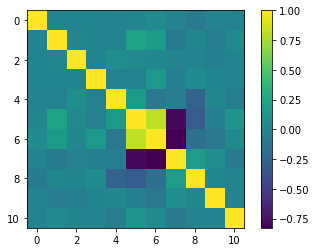

In [121]:
C = (Xn.T) @ Xn #calculate correlation matrixs. and show it.
plt.imshow(C/n)
plt.colorbar()

In [157]:
vals, V = np.linalg.eig(C)  #Calculate the matrix's proper factors  𝐶
L = np.diag(vals)
vals
print(V)

[[ 0.03050658 -0.03672363  0.00484977  0.06792449  0.18849663 -0.1285457
  -0.34791277 -0.36428273  0.6371124   0.36563105  0.38429808]
 [ 0.15038004  0.02665139  0.15752774 -0.19487852 -0.10194517 -0.48287296
  -0.45172424  0.46254889  0.1295797  -0.45761132  0.16161229]
 [ 0.0266681  -0.0110766   0.01699753  0.17239638 -0.17351866  0.30317991
  -0.37981946 -0.37457379 -0.46541589 -0.29685392  0.50776704]
 [ 0.04466912 -0.12053495 -0.00399703 -0.27312144 -0.10583526 -0.58956927
   0.12004781 -0.11800888 -0.48717048  0.47686708  0.23874006]
 [ 0.06423207  0.1840439   0.03035817  0.67575008  0.59143623 -0.30442196
   0.03432148  0.10060893 -0.21956984 -0.04004268  0.02929672]
 [ 0.56246001 -0.57244854 -0.57290358  0.06369263  0.08273361  0.0297981
  -0.06280337  0.0434613  -0.00928147 -0.05002872 -0.08666722]
 [ 0.5540233   0.75300739 -0.23837769 -0.19422103 -0.00505628  0.11636736
  -0.01156433  0.00644017 -0.02989428  0.12576004  0.03226341]
 [-0.54146156  0.21581337 -0.76275625  0.06

In [119]:
np.mean(X,axis=0).shape

(11,)

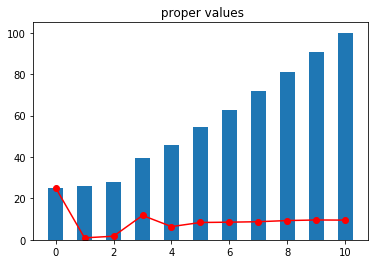

In [120]:
vpc = 100 * np.cumsum(vals) / np.sum(vals) #visualize their own values and their importance as a percentage of information
plt.bar(np.arange(11), vpc, 0.5)
plt.plot(100*vals/ np.sum(vals), 'r-o')
plt.title(" proper values")                    
plt.show()

In [107]:
U = Xn@V  #Calculate the main components
print(U)

[[-1.91940449  0.0631038   0.52297283 ...  0.48368689 -0.21821592
  -1.8335896 ]
 [-1.8643746   0.04313989  0.48760097 ...  0.36429635 -0.16206437
  -1.79822481]
 [-1.7960905  -0.15269948  0.27604221 ...  0.2685831  -0.13286767
  -1.77980396]
 ...
 [-3.12554498 -0.24229135 -0.14540654 ... -0.80654329 -0.49444697
   2.4848153 ]
 [-3.18247244 -0.32954277 -0.13324438 ... -0.88355353 -0.43947348
   2.51982606]
 [-3.10158645 -0.31987717 -0.19658614 ... -0.97735575 -0.36893656
   2.55519583]]


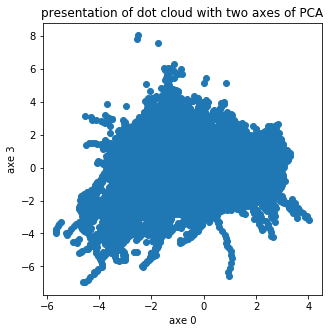

In [165]:
plt.figure(figsize=(5,5))
plt.title('presentation of dot cloud with two axes of PCA')
plt.plot(U[:, 0], U[:, 3],'o');
plt.xlabel('axe 0');
plt.ylabel('axe 3');



Text(0, 0.5, 'axe 3')

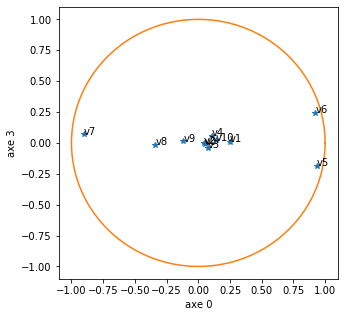

In [163]:
Vn = V@np.sqrt(L) / np.sqrt(n)
plt.figure(figsize=(5,5))
a = np.linspace(0, 2*np.pi, 100)

plt.plot(Vn[:, 0], Vn[:, 1],'*')

for i in range(p):
    plt.text(Vn[i, 0], Vn[i, 1],'v'+str(i))


plt.plot(np.cos(a),np.sin(a),'-')
plt.xlabel('axe 0')
plt.ylabel('axe 3')



Text(0.5, 1.0, 'Error of the reconstruction by PCA')

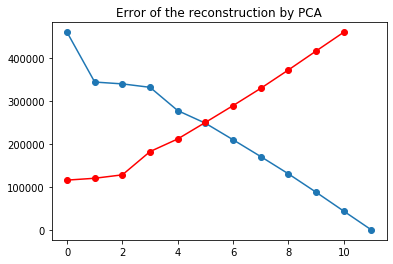

In [158]:
diff = np.zeros((p+1,))
diff[0] = np.sum(Xn**2)
for i in range(0, p):
    diff[i+1] = np.sum((Xn - (U[:,:i+1]@V[:,:i+1].T))**2)
plt.plot(diff, '-o')
plt.plot(np.cumsum(vals), 'r-o')
plt.title("Error of the reconstruction by PCA")

In [114]:
print(vpc)

[ 25.19422789  26.12996274  27.86274482  39.63805125  46.01639768
  54.38138161  62.88593967  71.62368876  80.92277084  90.49407506
 100.        ]


In [159]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_ratio_)

[0.7529861 0.1976071]


In [127]:
pca.components_

array([[-1.17726524e-04, -8.83117145e-04,  7.70159865e-03,
        -2.11564376e-03,  9.83136971e-01,  3.07971967e-02,
        -9.16842969e-03, -7.35318175e-03, -1.79694057e-01,
         1.37079413e-04, -7.36392702e-04],
       [-2.24196075e-03, -2.00825706e-04,  4.29669357e-03,
         7.35346334e-03,  1.81022947e-01, -8.56223247e-02,
        -5.79700968e-02,  4.46547531e-02,  9.76967831e-01,
         5.32683750e-04, -9.50611954e-04]])

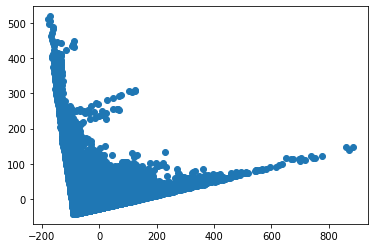

In [128]:
X_new = pca.transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1],marker='o')
plt.show()